<a href="https://colab.research.google.com/github/FrancescoMonaco/LFN_Project/blob/francesco_branch/LFN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations, Imports, Data Retrieval


In [ ]:
!pip install nilearn

In [3]:
from nilearn import datasets, plotting
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [31]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

# Loading the functional datasets
data = datasets.fetch_adhd(n_subjects=1)


Dataset created in /root/nilearn_data/msdl_atlas



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.



Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/e7ff5670bd594dcd9453e57b55d69dc9/adhd40_0010042.tgz..... done.


# MRI to Graph

In [32]:
from nilearn.maskers import NiftiMapsMasker

masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

time_series = masker.fit_transform(data.func[0], confounds=data.confounds)

[NiftiMapsMasker.wrapped] loading regions from None
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7e71cb082b90>, interpolation='continuous', target_shape=(61, 73, 61), target_affine=array([[  -3.,   -0.,   -0.,   90.],
       [  -0.,    3.,   -0., -126.],
       [   0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]]))


/usr/local/lib/python3.10/dist-packages/nilearn/_utils/cache_mixin.py:241: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn(


_____________________________________________________resample_img - 3.4s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('/root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7e7229970580>, { 'allow_overlap': True,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_maps': True,
  'low_pass': None,
  'maps_img': '/root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=['/root/nilearn_data/adhd/data/0010042/0010042_regressors.csv'], sample_mask=None, dtype=None, memory=Memory(l

In [33]:
try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

estimator = GraphicalLassoCV()
estimator.fit(time_series)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:272: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:273: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


GraphicalLassoCV()

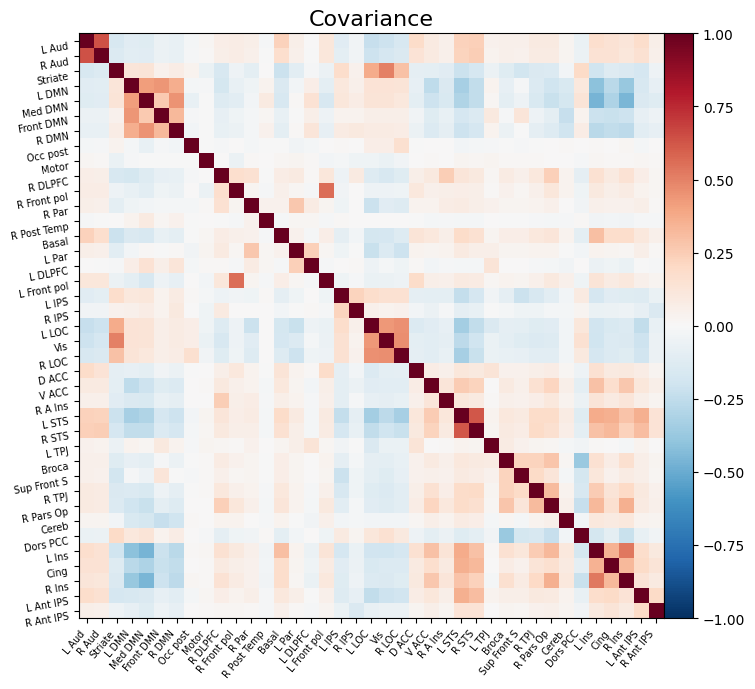

In [34]:
plotting.plot_matrix(
    estimator.covariance_,
    labels=labels,
    figure=(9, 7),
    vmax=1,
    vmin=-1,
    title="Covariance",
)

In [36]:
covariance_matr = np.array(estimator.covariance_)
graph = nx.from_numpy_array(covariance_matr)

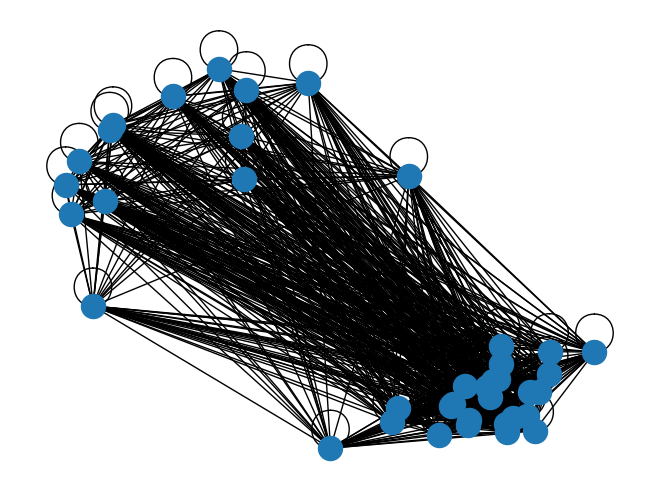

In [37]:
nx.draw(graph)

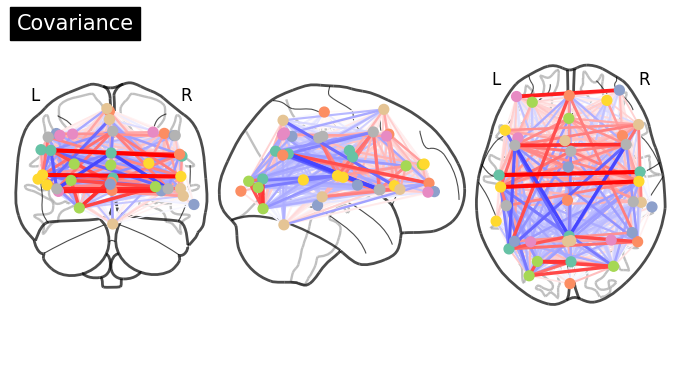

In [35]:
coords = atlas.region_coords

plotting.plot_connectome(estimator.covariance_, coords, title="Covariance")